In [1]:
from utils import Dataset
import matplotlib.pyplot as plt

In [2]:
dataset = Dataset(
    "/Users/reza/Career/DMLab/AR TRACKING/ar-track/data/HEK-JSOC/2024_test/images",
    "/Users/reza/Career/DMLab/AR TRACKING/ar-track/data/HEK-JSOC/2024_test/labels",
)

patch size: 134


torch.Size([1, 134, 134])


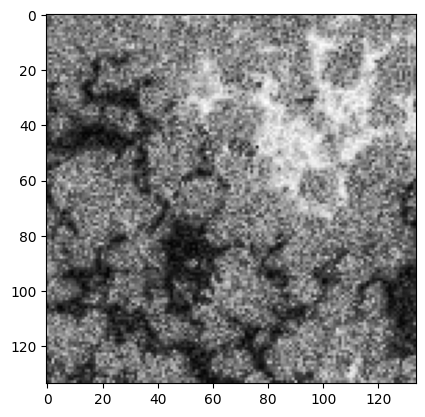

torch.Size([1, 134, 134])


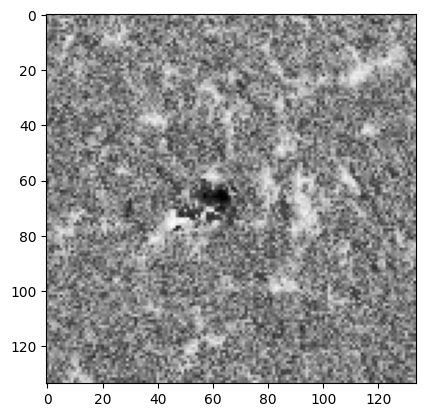

torch.Size([1, 134, 134])


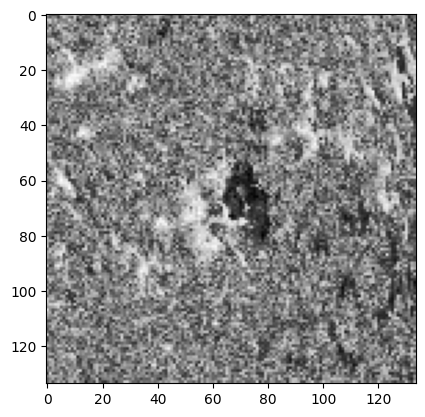

torch.Size([1, 134, 134])


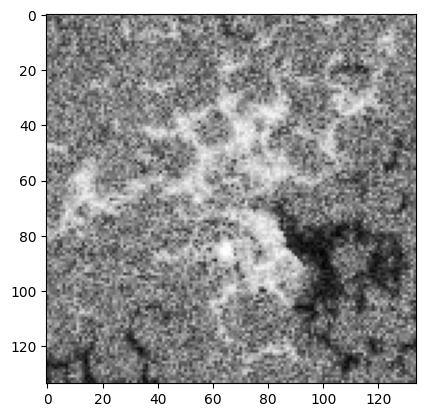

torch.Size([1, 134, 134])


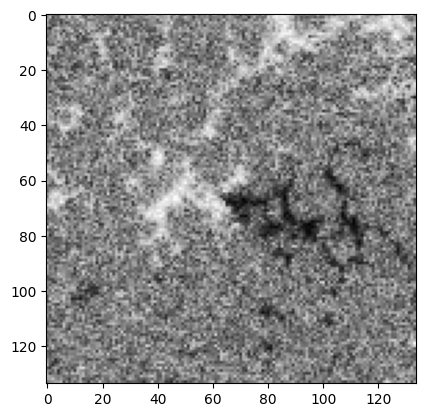

torch.Size([1, 134, 134])


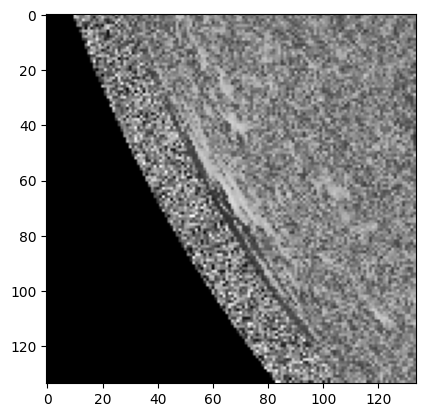

torch.Size([1, 134, 134])


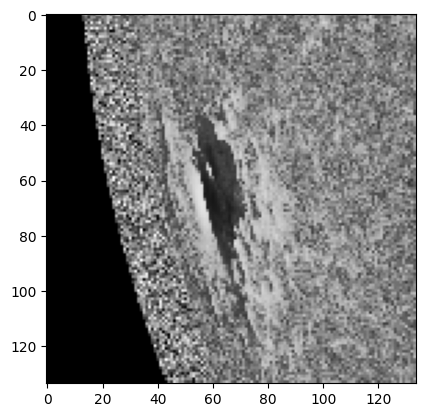

torch.Size([1, 134, 134])


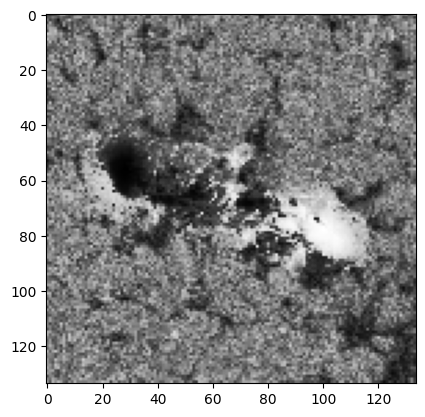

torch.Size([1, 134, 134])


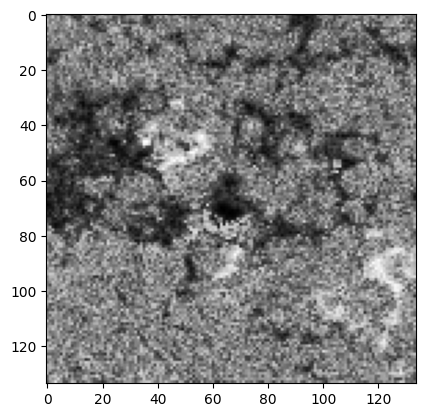

torch.Size([1, 134, 134])


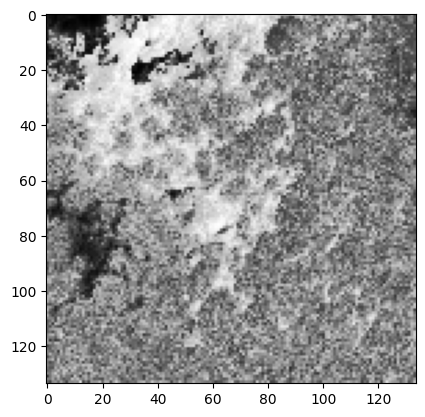

In [3]:
for i in range(10):
    x = dataset[i]
    print(x.shape)
    plt.imshow(x[0], cmap="gray")
    plt.show()